# Ornstein Uhlenbeck Mean Reversion Process

- $dX_t = \kappa (\theta - X_t) dt + \sigma dW_t$

In [1]:
import numpy as np
import scipy as scp
import scipy.stats as ss
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse.linalg import spsolve
import pandas as pd
import matplotlib as mpl

pd.set_option("display.precision", 4)
plt.style.use("seaborn")
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [22]:
np.random.seed(seed=42) 

N = 2000           # time steps 
paths = 500        # number of paths 
T = 5
T_vec, dt = np.linspace(0, T, N, retstep=True ) 

dt

0.0025012506253126563

In [54]:
kappa = 8
theta = 10
sigma = 4

X0 = 10
X = np.zeros((paths,N))
X[:,0] = X0
W = ss.norm.rvs(loc =0, scale = 1, size = (paths, N-1))


In [55]:
std_dt = np.sqrt(sigma**2 /(2*kappa) * (1-np.exp(-2*kappa*dt)) )
for t in range(0,N-1):
    X[:,t+1] = theta + np.exp(-kappa*dt)*(X[:,t]-theta) + std_dt * W[:,t]

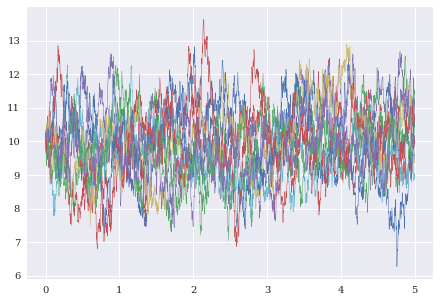

In [56]:
N_processes = 10
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(121)
ax1.plot(T_vec, X[:N_processes,:].T, linewidth=0.5)